# Introduction

For building any machine learning model, it is important to have a sufficient amount of data to train the model. The data is often collected from various resources and might be available in different formats. Due to this reason, data cleaning and preprocessing becomes a crucial step in the machine learning project.

Whenever new data points are added to the existing data, we need to perform the same preprocessing steps again before we can use the model to make predictions. This becomes a tedious and time consuming process!

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


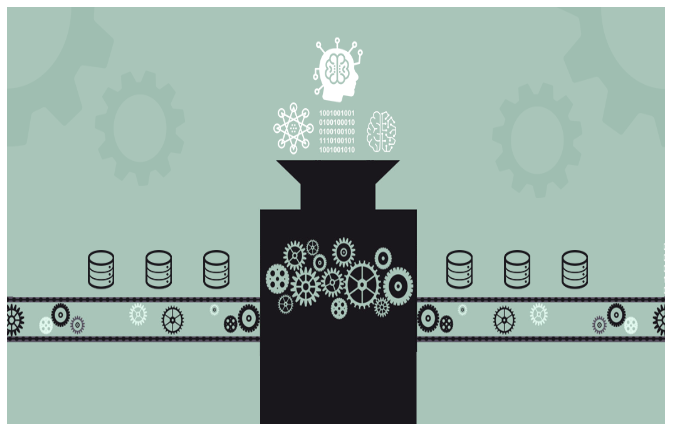

In [ ]:
# import cv
import cv2
from google.colab.patches import cv2_imshow

# Read an image using OpenCV
image = cv2.imread('/content/drive/MyDrive/ds_project_24/machine_learning_pipeline_using_scikit-learn/pipeline.png')

# Display the image using cv2_imshow
cv2_imshow(image)

An alternate to this is creating a machine learning pipeline that remembers the complete set of preprocessing steps in the exact same order. So that whenever any new data point is introduced, the machine learning pipeline performs the steps as defined and uses the model to predict the target variable.

# Understanding Problem Statement

we will learn all the concepts while simultaneously working on real-world data - BigMart Sales Prediction.

As a part of this problem, we are provided with information about the stores (location, size, etc), products (weight, category, price, etc) and historical sales data. Using this information, we have to forecast the sales of the products in the stores.

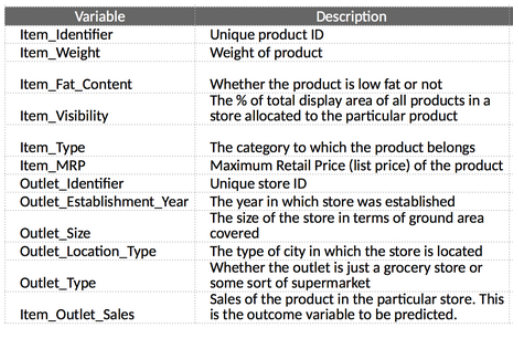

In [ ]:
image = cv2.imread('/content/drive/MyDrive/ds_project_24/machine_learning_pipeline_using_scikit-learn/descBigmart.png')
cv2_imshow(image)

# Building a prototype model

To build a machine learning pipeline, the first requirement is to define the structure of the pipeline. In other words, we must list down the exact steps which would go into our machine learning pipeline.

In order to do so, we will build a prototype model on the existing data before we create a pipeline. The main idea behind building a prototype is to understand the data and necessary preprocessing steps required before the model building process. Based on our learning from the prototype model, we will design a machine learning pipeline that covers all the essential preprocessing steps. This includes-

  1. Data Exploration and Preprocessing
  2. Encode the categorical variables
  3. Normalize/Scale the data if required

# Data Exploration and Preprocessing

What is the first thing you do when you are provided with a dataset? You would explore the data, go through the individual variables, and clean the data to make it ready for the model building process.

That is exactly what we will be doing here. We will explore the variables and find out the mandatory preprocessing steps required for the given data. Let us start by checking if there are any missing values in the data. We will use the **isnull().sum()** function here.

In [ ]:
# importing required values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# read the train data
train_data = pd.read_csv('/content/drive/MyDrive/ds_project_24/machine_learning_pipeline_using_scikit-learn/train_bigmart.csv')
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# check for the null values
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are only two variables with missing values –Item_WeightandOutlet_Size.

SinceItem_Weightis a continuous variable, we can use either mean or median to impute the missing values. On the other hand,Outlet_Sizeis a categorical variable and hence we will replace the missing values by the mode of the column.

In [ ]:
# impute missing value in item weight by mean
train_data.Item_Weight.fillna(train_data.Item_Weight.mean(), inplace=True)

In [ ]:
# impute outlet size in training data by mode
train_data.Outlet_Size.fillna(train_data.Outlet_Size.mode()[0], inplace=True)

Imputing missing values becomes a necessary preprocessing step.

Additionally, ML models cannot work with categorical (string) data as well, specifically scikit-learn. Before building a machine learning model, we need to convert the categorical variables into numeric types. Let us do that in the next text.

## Encode the categorical variables

To check the categorical variables in the data, we can use the train_data.dtypes() function. This will give you a list of the data types against each variable. For the BigMart sales data, we have the following categorical variable -
  * Item_Fat_Content
  * Item_Type, Outlet_Identifier
  * Outlet_Size, Outlet_Location_Type, and
  * Outlet_Type

  We are going to use the categorical_encoders library in order to convert the variables into binary columns.

  In this example I will not code Item_Identifier because it would increase the number of features to 1500. In order to keep the model simple, I will not use this feature here.

In [ ]:
# install module category_encoders
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.1 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

# create an object of the OneHotEncoder
OHE = ce.OneHotEncoder(cols=['Item_Fat_Content',
                             'Item_Type',
                             'Outlet_Identifier',
                             'Outlet_Size',
                             'Outlet_Location_Type',
                             'Outlet_Type'],
                       use_cat_names=True)

In [ ]:
# encode the categorical variables
train_data = OHE.fit_transform(train_data)

## Scale the data

**So far we have taken care of the missing values and the categorical (string) variables in the data. Next, we will work with the continuous variables. Often the continuous variables in the data have different scales, for instance, a variable V1 can have a range from 0 to 1 while another variable can have a range from 0-1000.**

Based on the type of model we are building, we will have to normalize the data in such a way that the range of all the variables is almost similar. You can do this easily in python using the StandardScaler function.


In [ ]:
from sklearn.preprocessing import StandardScaler

# create an object of the StandardScaler
scaler = StandardScaler()
# fit with the Item_MRP
scaler.fit(np.array(train_data.Item_MRP).reshape(-1,1))
# transform the data
train_data.Item_MRP = scaler.transform(np.array(train_data.Item_MRP).reshape(-1,1))

## Model Building

**Now that we are done with the basic preprocessing steps, we can go ahead and build simple machine learning models over this data. We will try two models here – Linear Regression and Random Forest Regressor to predict sales.**

To compare the performance of the models, we will create a validation set (or test set). Here I have randomly split the data into two parts using thetrain_test_split() function, such that the validation set holds 25% of the data points while the train set has 75%

In [ ]:
# importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# separate the independent and target variable
train_X = train_data.drop(columns=['Item_Identifier','Item_Outlet_Sales'])
train_Y = train_data['Item_Outlet_Sales']

# randomly split the data
train_x, test_x, train_y, test_y = train_test_split(train_X, train_Y,test_size=0.25,random_state=0)

# shape of train and test splits
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((6392, 45), (2131, 45), (6392,), (2131,))

Great, we have our train and validation sets ready. Let us train a linear regression model on this data and check it’s performance on the validation set. To check the model performance, we are using RMSE as an evaluation metric.

In [ ]:
# create an object of the LinearRegression Model
model_LR = LinearRegression()

# fit the model with the training data
model_LR.fit(train_x, train_y)

# predict the target on train and test data
predict_train = model_LR.predict(train_x)
predict_test = model_LR.predict(test_x)

# Root Mean Squared Error on train and test date
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ', mean_squared_error(test_y, predict_test)**(0.5));

RMSE on train data:  1120.4103173281871
RMSE on test data:  1148.7331734357729


The linear regression model has a very high RMSE value on both training and validation data. Let us see if a tree-based model performs better in this case. Here we will train a random forest and check if we get any improvement in the train and validation errors.

In [ ]:
# create an object of the RandomForestRegressor
model_RFR = RandomForestRegressor(max_depth=10)

# fit the model with the training data
model_RFR.fit(train_x, train_y)

# predict the target on train and test data
predict_train = model_RFR.predict(train_x)
predict_test = model_RFR.predict(test_x)

# Root Mean Squared Error on train and test data
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ', mean_squared_error(test_y, predict_test)**(0.5));

RMSE on train data:  899.006129569438
RMSE on test data:  1118.2349479540685


As you can see, there is a significant improvement on is the RMSE values. You can train more complex models like Gradient Boosting and XGBoost, and see of the RMSE value further improves.

A very interesting feature of the random forest algorithm is that it gives you the ‘feature importance’ for all the variables in the data. Let us see how can we use this attribute to make our model simpler and better!

## Feature Importance

After the preprocessing and encoding steps, we had a total of 45 features and not all of these may be useful in forecasting the sales. Alternatively, we can select the top 5 or top 7 features, which had a major contribution in forecasting sales values.

If the model performance is similar in both the cases, that is - by using 45 features and by using 5-7 features, then we should use only the top 7 features, in order to keep the model more simple and efficient.

***The idea is to have a less complex model without compromising on the overall model performance.***

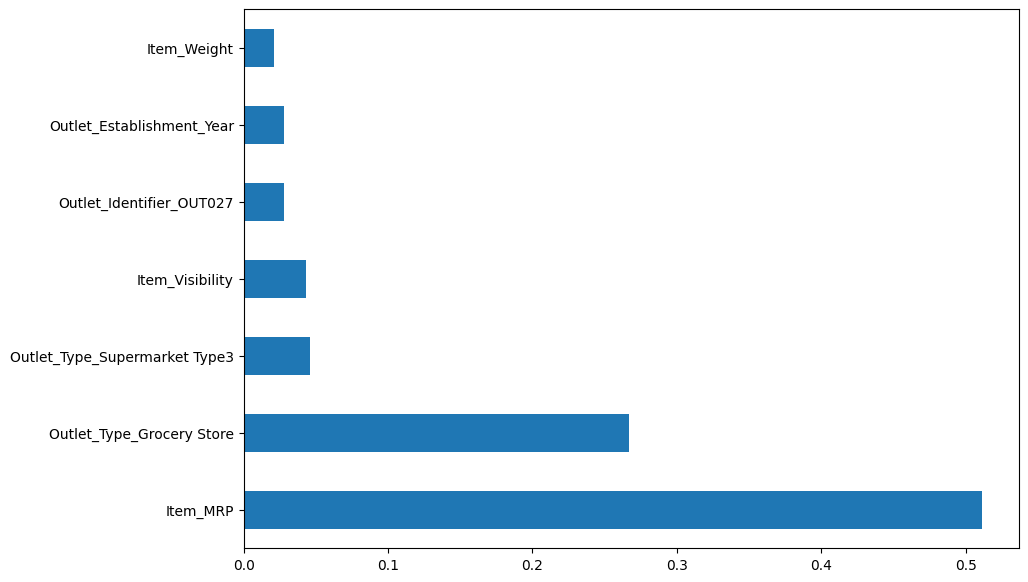

In [ ]:
# plot the 7 most important features
plt.figure(figsize=(10,7))
feat_importances = pd.Series(model_RFR.feature_importances_, index = train_x.columns)
feat_importances.nlargest(7).plot(kind='barh');

Now, we are going to train the same random forest model using these 7 features only and observe the change in RMSE values for the train and the validation set.

In [ ]:
# training data with 7 most important features
train_x_if = train_x[['Item_MRP',
                      'Outlet_Type_Grocery Store',
                      'Item_Visibility',
                      'Outlet_Type_Supermarket Type3',
                      'Outlet_Identifier_OUT027',
                      'Outlet_Establishment_Year',
                      'Item_Weight']]

# test data with 7 most important features
test_x_if = test_x[['Item_MRP',
                    'Outlet_Type_Grocery Store',
                    'Item_Visibility',
                    'Outlet_Type_Supermarket Type3',
                    'Outlet_Identifier_OUT027',
                    'Outlet_Establishment_Year',
                    'Item_Weight']]

In [ ]:
# create an object of the RandfomForestRegressor Model
model_RFR_with_if = RandomForestRegressor(max_depth=10,random_state=2)

In [ ]:
# fit the model with the training data
model_RFR_with_if.fit(train_x_if, train_y)

RandomForestRegressor(max_depth=10, random_state=2)

In [ ]:
# predict the target on the training and test data
predict_train_with_if = model_RFR_with_if.predict(train_x_if)
predict_test_with_if = model_RFR_with_if.predict(test_x_if)

In [ ]:
# Root Mean Squared Error on the train and test data
print('RMSE on train data: ', mean_squared_error(train_y, predict_train_with_if)**(0.5))
print('RMSE on test data: ', mean_squared_error(test_y, predict_test_with_if)**(0.5))

RMSE on train data:  899.8582438552843
RMSE on test data:  1117.7016540152065


Now, this is amazing! Using only 7 features has given almost the same performance as the previous model where we were using 45 features. Let us identify the final set of features that we need and the preprocessing steps for each of them.

# Identifying features to build the ML pipeline

As discussed initially, the most important part of designing a machine learning pipeline is defining its structure, and we are almost there!

We are now familiar with the data, we have performed required preprocessing steps, and built a machine learning model on the data. At this stage, we must list down the final set of features and necessary preprocessing steps (for each of them) to be used in the machine learning pipeline.

**Selected Features and Preprocessing Steps**

  1. **Item_MRP:** It holds the price of the products. During the preprocessing step we used a standard scaler to scale these values.
  2. **Outlet_Type_Grocery_Store:** A binary column which indicates if the outlet type is a grocery store or not. To use this information in the model building process, we will add a binary feature in the existing data that contains 1 (if outlet type is a grocery store) and 0 ( if outlet type is something else).
  3. **Item_Visibility:** Denotes the visibility of products in the store. Since this variable had a small value range and no missing values, we didn’t apply any preprocessing steps on this variable.
  4. **Outlet_Type_Supermarket_Type3:** Another binary column indicating if the outlet type is a “supermarket_type_3” or not. To capture this information we will create a binary feature that stores 1 (if outlet type is supermarket_type_3) and 0 (otherwise).
  5. **Outlet_Identifier_OUT027:** This feature specifies whether the outlet identifier is “OUT027” or not. Similar to the last previous example, we will create a separate column that carries 1 (if outlet type is a grocery store) and 0 (otherwise).
  6. **Outlet_Establishment_Year:** The Outlet_Establishment_Year describes the year of establishment of the stores. Since we did not perform any transformation on values in this column, we will not preprocess it in the pipeline as well.
  7. **Item_Weight:** During the preprocessing steps we observed that Item_Weight had missing values. These missing values were imputed using the average of the column. This has to be taken into account while building the machine learning pipeline.

Apart from these 7 columns, we will drop the rest of the columns since we will not use them to train the model. Let us go ahead and design our ML pipeline!

# Pipeline Design

In the last section, we built a prototype to understand the preprocessing requirement for our data. It is now time to form a pipeline design based on our learning from the last section. We will define our pipeline in three stages:

  1. Create the required binary features
  2. Perform required data preprocessing and transformations
  3. Build a model to predict the sales

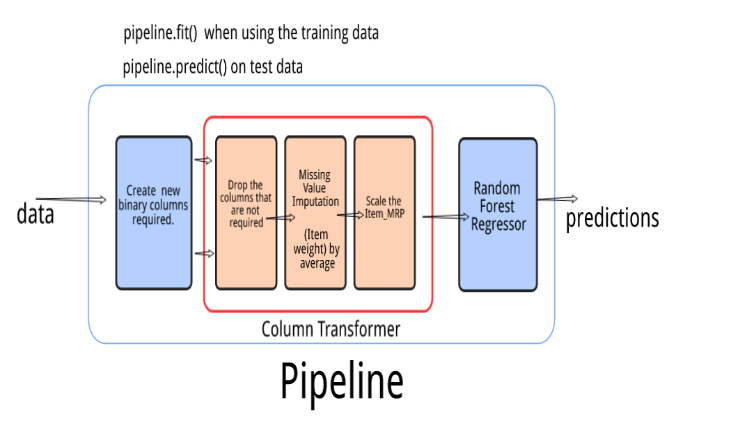

In [ ]:
image =cv2.imread('/content/drive/MyDrive/ds_project_24/machine_learning_pipeline_using_scikit-learn/pipeline2.png')
cv2_imshow(image)

**1. Create the required binary features**
We will create a custom transformer that will add 3 new binary columns to the existing data.
  * Outlet_Type: Grocery Store
  * Outlet_Type : Supermarket Type3
  * Outlet_Identifier_OUT027

**2. Data Preprocessing and transformations.**
We will use a ColumnTransformer to do the required transformations. It will contain 3 steps.
  1. Drop the columns that are not required for model training
  2. Impute missing values in the column Item_Weight using the average
  3. Scale the column Item_MRP using StandardScaler()

**3. Use the model to predict the target on the cleaned data**
This will be the final step in the pipeline. In the last two steps, we preprocessed the data and made it ready for the model building process. Finally, we will use this data and build a machine learning model to predictItem Outlet Sales.

Let’s code each step of the pipeline on the BigMart Sales data.

# Building Pipeline

First of all, we will read the data set and separate the independent and target variable from the training dataset

In [ ]:
# importing required libraries

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [ ]:
# read the training data set
data = pd.read_csv('/content/drive/MyDrive/ds_project_24/machine_learning_pipeline_using_scikit-learn/train_bigmart.csv')

In [ ]:
# top row of the data
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# separate the independent and target variables
train_x = data.drop(columns=['Item_Outlet_Sales'])
train_y = data['Item_Outlet_Sales']

Now, as a first step, we need to create 3 new binary columns using a custom transformer. Here are the steps we need to follow to create a custom transformer.

  1. Define a class **OutletTypeEncoder**
  2. Add the parameter **BaseEstimator** while defining the class
  3. The class must contain fit and transform methods

In the transform method, we will define all the 3 columns that we want after the first stage in our ML pipeline.

In [ ]:
# import the BaseEstimator
from sklearn.base import BaseEstimator

# define the class OutletTypeEncoder
# This will be our custom transformer that will create 3 new binary columns
# custom transformer must have methods fit and transform
class OutletTypeEncoder(BaseEstimator):

  def __init__(self):
    pass

  def fit(self, documents, y=None):
    return self

  def transform(self, x_dataset):
    x_dataset['outlet_grocery_store'] = (x_dataset['Outlet_Type'] == 'Grocery Store')*1
    x_dataset['outlet_supermarket_3'] = (x_dataset['Outlet_Type'] == 'Supermarket Type3')*1
    x_dataset['outlet_identifier_OUT027'] = (x_dataset['Outlet_Identifier'] == 'OUT027')*1

    return x_dataset

Next, we will define the pre-processing steps required before the model building process.

  1. Drop the columns – **Item_Identifier, Outlet_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type and Outlet_Establishment_Year**
  2. Impute missing values in column **Item_Weight** with mean
  3. Scale the column **Item_MRP** using StandardScaler().
  
This will be the second step in our machine learning pipeline. After this step, the data will be ready to be used by the model to make predictions.

In [ ]:
# pre-processsing step
# Drop the columns -
# Impute the missing values in column Item_Weight by mean
# Scale the data in the column Item_MRP
pre_process = ColumnTransformer(transformers=[
                                    ('drop_columns', 'drop', ['Item_Identifier',
                                                              'Outlet_Identifier',
                                                              'Item_Fat_Content',
                                                              'Item_Type',
                                                              'Outlet_Identifier',
                                                              'Outlet_Size',
                                                              'Outlet_Location_Type',
                                                              'Outlet_Type'
                                                              ]),
                                                               ('impute_item_weight', SimpleImputer(strategy='mean'), ['Item_Weight']),
                                                                ('scale_data', StandardScaler(),['Item_MRP'])
                                                                ],
                                remainder='passthrough'
                                )

# Predict the Target

This will be the final block of the machine learning pipeline – define the steps in order for the pipeline object! As you can see in the code below we have specified three steps – create binary columns, preprocess the data, train a model.

When we use thefit() function with a pipeline object, all three steps are executed. Post the model training process, we use the predict() function that uses the trained model to generate the predictions.

In [ ]:
# Define the Pipeline
'''
Step1: get the oultet binary columns
Step2: pre processing
Step3: Train a Random Forest Model
'''
model_pipeline = Pipeline(steps=[('get_outlet_binary_columns', OutletTypeEncoder()),
 ('pre_processing',pre_process),
  ('random_forest', RandomForestRegressor(max_depth=10,random_state=2))
  ])

# fit the pipeline with the training data
model_pipeline.fit(train_x,train_y)

# predict target values on the training data
model_pipeline.predict(train_x)

array([4348.01437159,  693.40276088, 2323.35268531, ..., 1300.83665376,
       1508.86795688, 1152.35475793])

Now, we will read the test data set and we call predict function only on the pipeline object to make predictions on the test data.

In [ ]:
# read the test data
test_data = pd.read_csv('/content/drive/MyDrive/ds_project_24/machine_learning_pipeline_using_scikit-learn/test_bigmart.csv')

In [ ]:
# predict target variables on the test data
model_pipeline.predict(test_data)

array([1646.0548363 , 1305.4298012 ,  658.42325097, ..., 1848.60226305,
       3959.67937864, 1384.01466986])

Having a well-defined structure before performing any task often helps in efficient execution of the same. And this is true even in case of building a machine learning model